In [144]:
# IMPORT LIBRARIES

In [145]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [146]:
# LOAD DATA

In [147]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [148]:
# NULL VALUES CHECK
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [149]:
# DATA DESCRIPTION
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [150]:
age_sex = df.groupby(['age','sex'])[['age']].count()

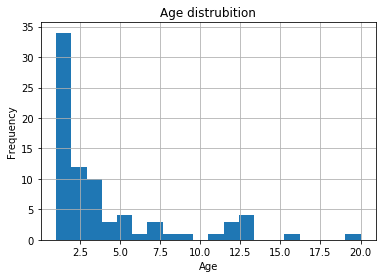

In [151]:
# DATA EXPLORATION
# AGE AND SEX DISTRUBITION
age_sex.hist(bins=20)
plt.title('Age distrubition')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


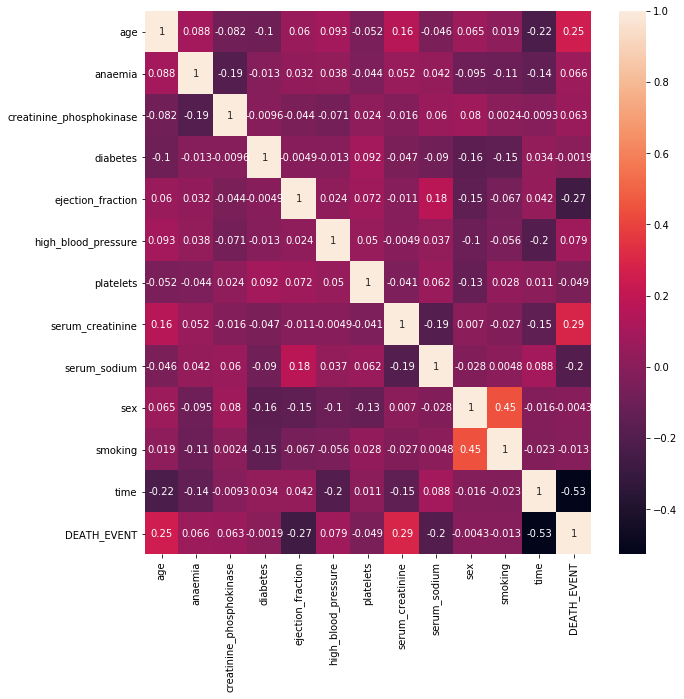

In [152]:
# CORRELATION HEATMAP
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),ax=ax,annot=True)
plt.show()

In [153]:
# RELEVANT FEATURES
corr = df.corr()
target = abs(corr['DEATH_EVENT'])
features = target[target>0.1]
features

age                  0.253729
ejection_fraction    0.268603
serum_creatinine     0.294278
serum_sodium         0.195204
time                 0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

In [154]:
# TRAIN TEST SPLIT
X_train, X_test, Y_train, Y_test = train_test_split(df.loc[:,{'age','ejection_fraction','serum_creatinine','serum_sodium','time'}],df.loc[:,{'DEATH_EVENT'}],test_size=0.3)

In [155]:
print("X_train shape :",X_train.shape)
print("Y_train shape :",Y_train.shape)
print("X_test shape :",X_test.shape)
print("Y_test shape :",Y_test.shape)

X_train shape : (209, 5)
Y_train shape : (209, 1)
X_test shape : (90, 5)
Y_test shape : (90, 1)


In [156]:
# CREATE MODEL
# ALGORITHMS
# SVC
# GradientBoostingClassifier
# RandomForestClassifier
# DecisionTreeClassifier
# KNeighborsClassifier
# LogisticRegression

algorithm = []
accuracy = []
predict = []

In [157]:
# SVC
svm = SVC()
svm.fit(X_train, Y_train)
algorithm.append("SVC")
accuracy.append(svm.score(X_test,Y_test))

cm = confusion_matrix(Y_test, svm.predict(X_test))
predict.append(cm.item(0)+cm.item(2))

cr = classification_report(Y_test, svm.predict(X_test))

print ("Acucuracy: ", svm.score(X_test, Y_test))
print (cr)
print ("Predict: ", cm.item(0)+cm.item(2))

Acucuracy:  0.8111111111111111
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        64
           1       0.74      0.54      0.62        26

    accuracy                           0.81        90
   macro avg       0.78      0.73      0.75        90
weighted avg       0.80      0.81      0.80        90

Predict:  71


In [158]:
# GradientBoostingClassifier
gb = GradientBoostingClassifier()
param_grid = {'n_estimators': [10,20,50],'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],'max_features': [2],'max_depth': [2]}
gb_gscv = GridSearchCV(gb, param_grid, cv=4)
gb_gscv.fit(X_train,Y_train)
print("The best parameters are ",gb_gscv.best_params_)
accuracy.append(gb_gscv.score(X_test,Y_test))
algorithm.append("GradientBoostingClassifier")

cm = confusion_matrix(Y_test, gb_gscv.predict(X_test))
predict.append(cm.item(0)+cm.item(2))

cr = classification_report(Y_test, gb_gscv.predict(X_test))

print ("Acucuracy: ", gb_gscv.score(X_test,Y_test))
print (cr)
print ("Predict: ", cm.item(0)+cm.item(2))

The best parameters are  {'learning_rate': 0.075, 'max_depth': 2, 'max_features': 2, 'n_estimators': 50}
Acucuracy:  0.7666666666666667
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        64
           1       0.60      0.58      0.59        26

    accuracy                           0.77        90
   macro avg       0.72      0.71      0.71        90
weighted avg       0.76      0.77      0.77        90

Predict:  65


In [159]:
# RandomForestClassifier
param_grid = {'n_estimators': np.arange(10, 100, 10)}
rf = RandomForestClassifier(random_state = 42)
rf_gscv = GridSearchCV(rf, param_grid, cv=4)
rf_gscv.fit(X_train, Y_train)
print("Best K Value is ",rf_gscv.best_params_)

accuracy.append(rf_gscv.score(X_test,Y_test))
algorithm.append("RandomForestClassifier")

cm = confusion_matrix(Y_test, rf_gscv.predict(X_test))
predict.append(cm.item(0)+cm.item(2))

cr = classification_report(Y_test, rf_gscv.predict(X_test))

print ("Acucuracy: ", rf_gscv.score(X_test,Y_test))
print (cr)
print ("Predict: ", cm.item(0)+cm.item(2))

Best K Value is  {'n_estimators': 20}
Acucuracy:  0.8111111111111111
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        64
           1       0.70      0.62      0.65        26

    accuracy                           0.81        90
   macro avg       0.77      0.75      0.76        90
weighted avg       0.81      0.81      0.81        90

Predict:  67


In [160]:
# DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
accuracy.append(dt.score(X_test, Y_test))
algorithm.append("DecisionTreeClassifier")

cm = confusion_matrix(Y_test, dt.predict(X_test))
predict.append(cm.item(0)+cm.item(2))

cr = classification_report(Y_test, dt.predict(X_test))

print ("Accuracy: ", dt.score(X_test,Y_test))
print (cr)
print ("Predict: ", cm.item(0)+cm.item(2))

Accuracy:  0.7333333333333333
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        64
           1       0.53      0.62      0.57        26

    accuracy                           0.73        90
   macro avg       0.68      0.70      0.69        90
weighted avg       0.75      0.73      0.74        90

Predict:  60


In [161]:
# KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=4)
knn_gscv.fit(X_train, Y_train)
print("Best K Value is ",knn_gscv.best_params_)

accuracy.append(knn_gscv.score(X_test,Y_test))
algorithm.append("KNeighborsClassifier")

cm = confusion_matrix(Y_test, knn_gscv.predict(X_test))
predict.append(cm.item(0)+cm.item(2))

cr = classification_report(Y_test, knn_gscv.predict(X_test))

print ("Accuracy: ", knn_gscv.score(X_test,Y_test))
print (cr)
print ("Predict: ", cm.item(0)+cm.item(2))

Best K Value is  {'n_neighbors': 6}
Accuracy:  0.8
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        64
           1       0.70      0.54      0.61        26

    accuracy                           0.80        90
   macro avg       0.76      0.72      0.74        90
weighted avg       0.79      0.80      0.79        90

Predict:  70


In [162]:
# LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, Y_train)
accuracy.append(lg.score(X_test, Y_test))
algorithm.append("LogisticRegression")

print("test accuracy ",lg.score(X_test,Y_test))

cm = confusion_matrix(Y_test, lg.predict(X_test))
predict.append(cm.item(0)+cm.item(2))

cr = classification_report(Y_test, lg.predict(X_test))

print ("Accuracy: ", lg.score(X_test,Y_test))
print (cr)
print ("Predict: ", cm.item(0)+cm.item(2))

test accuracy  0.7555555555555555
Accuracy:  0.7555555555555555
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        64
           1       0.58      0.54      0.56        26

    accuracy                           0.76        90
   macro avg       0.70      0.69      0.70        90
weighted avg       0.75      0.76      0.75        90

Predict:  66


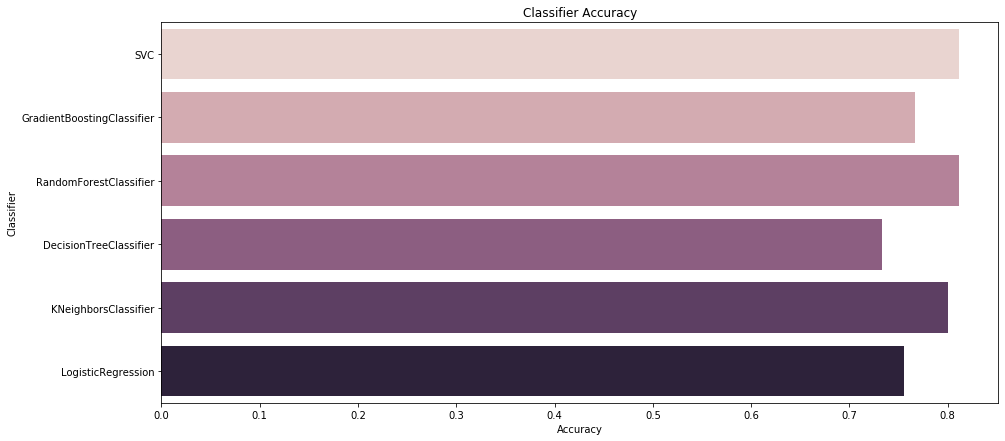

In [163]:
# EVALUATION
f,ax = plt.subplots(figsize = (15,7))
sns.barplot(x=accuracy,y=algorithm,palette = sns.cubehelix_palette(len(accuracy)))
plt.xlabel("Accuracy")
plt.ylabel("Classifier")
plt.title('Classifier Accuracy')
plt.show()

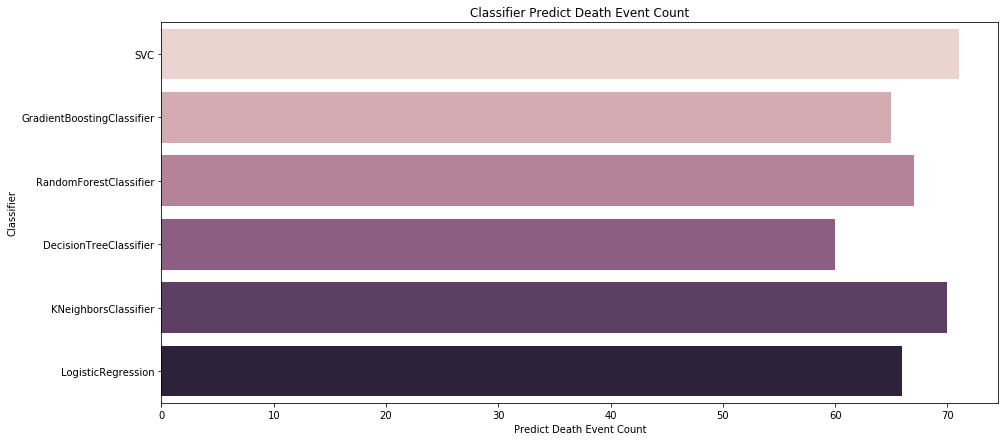

In [164]:
#Classifier Predict Death Event Count
f,ax = plt.subplots(figsize = (15,7))
sns.barplot(x=predict,y=algorithm,palette = sns.cubehelix_palette(len(accuracy)))
plt.xlabel("Predict Death Event Count")
plt.ylabel("Classifier")
plt.title('Classifier Predict Death Event Count')
plt.show()

In [ ]:
# TESTE XXXXXXXXXXXXXX